In [2]:
import pandas as pd

In [4]:
file_name = "data.xlsx"

In [62]:
df = None
l = None

mapping = pd.read_excel(file_name, sheet_name=None)
for sheet_name in mapping:
    df = mapping[sheet_name]
    l = df.values.tolist()

df['Dropout'] = (df['retention']).replace({0: 1, 1: 0})
#df.drop('student.id', axis=1, inplace=True)

print(df.shape)
#df.dropna(inplace=True)

l = df.values.tolist()


(77517, 51)


In [63]:
df.head(5)


,student.id,generation,educational.model,level,gender,age,max.degree.parents,father.education.complete,father.education.summary,mother.education.complete,...,physical.education,cultural.diffusion,student.society,total.life.activities,athletic.sports,art.culture,student.society.leadership,life.work.mentoring,wellness.activities,Dropout
0,2,AD14,0,Undergraduate,Male,19,No information,No information,No information,No information,...,0,0,0,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0
1,3,AD18,0,Undergraduate,Male,23,Undergraduate degree,Received undergraduate degree,Undergraduate degree,"Attended university, but did not graduate",...,Does not apply,Does not apply,Does not apply,1,0,0,0,1,0,1
2,4,AD14,0,Undergraduate,Male,19,No information,No information,No information,No information,...,0,0,0,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0
3,5,AD14,0,Undergraduate,Male,17,No information,No information,No information,No information,...,1,1,1,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0
4,6,AD14,0,Undergraduate,Female,17,No information,No information,No information,No information,...,0,1,1,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,0


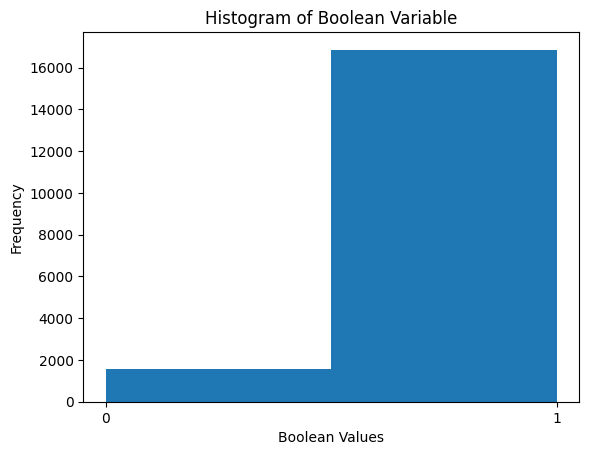

In [70]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'boolean_column' is the name of the boolean column

# Plotting the histogram
plt.hist(df["retention"], bins=2)
plt.xlabel('Boolean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Boolean Variable')
plt.xticks([0, 1])  # Set the x-axis ticks to match the boolean values
plt.show()


In [65]:
print(df.shape)

(77517, 51)


Column: generation
Unique Categories: ['AD14' 'AD18' 'AD15' 'AD16' 'AD20' 'AD17' 'AD19']
Frequency Counts:
AD20    12308
AD19    12199
AD18    11296
AD17    10788
AD16    10742
AD14    10143
AD15    10041
Name: generation, dtype: int64


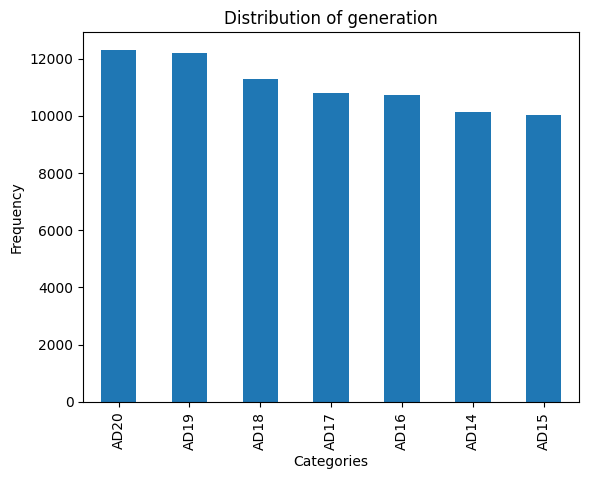

Cross-tabulation: generation vs level
level       Undergraduate
generation               
AD14                10143
AD15                10041
AD16                10742
AD17                10788
AD18                11296
AD19                12199
AD20                12308
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: generation vs gender
gender      Female  Male
generation              
AD14          4365  5778
AD15          4354  5687
AD16          4733  6009
AD17          5001  5787
AD18          5165  6131
AD19          5568  6631
AD20          5517  6791
Chi-square statistic: 41.511545072228316
p-value: 2.2957158729014134e-07

Cross-tabulation: generation vs max.degree.parents
max.degree.parents  Master degree  No degree  No information  PhD  \
generation                                                          
AD14                           24         24           10014    4   
AD15                           46         31            9881    7   
AD16                   

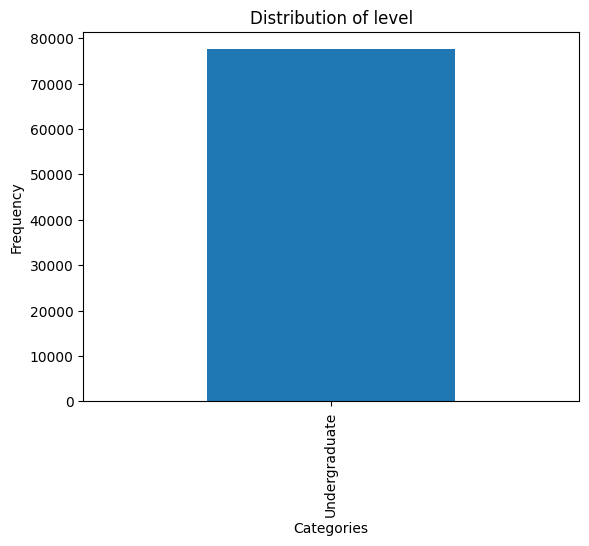

Cross-tabulation: level vs generation
generation      AD14   AD15   AD16   AD17   AD18   AD19   AD20
level                                                         
Undergraduate  10143  10041  10742  10788  11296  12199  12308
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: level vs gender
gender         Female   Male
level                       
Undergraduate   34703  42814
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: level vs max.degree.parents
max.degree.parents  Master degree  No degree  No information   PhD  \
level                                                                
Undergraduate               11862       5740           35255  1835   

max.degree.parents  Undergraduate degree  
level                                     
Undergraduate                      22825  
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: level vs father.education.complete
father.education.complete  Attended university, but did not graduate  \
level                

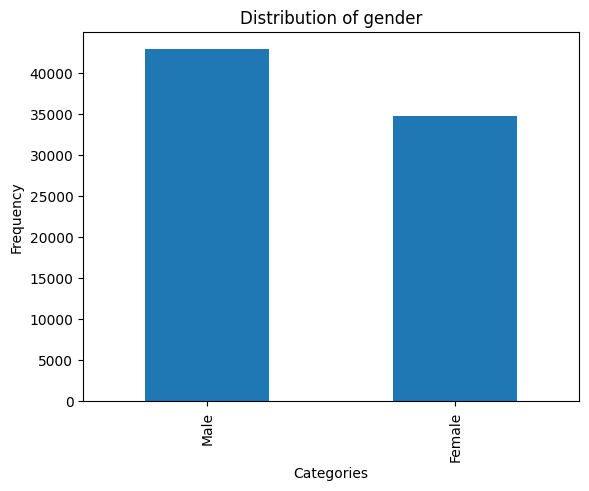

Cross-tabulation: gender vs generation
generation  AD14  AD15  AD16  AD17  AD18  AD19  AD20
gender                                              
Female      4365  4354  4733  5001  5165  5568  5517
Male        5778  5687  6009  5787  6131  6631  6791
Chi-square statistic: 41.511545072228316
p-value: 2.2957158729014134e-07

Cross-tabulation: gender vs level
level   Undergraduate
gender               
Female          34703
Male            42814
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: gender vs max.degree.parents
max.degree.parents  Master degree  No degree  No information  PhD  \
gender                                                              
Female                       5336       2674           15559  845   
Male                         6526       3066           19696  990   

max.degree.parents  Undergraduate degree  
gender                                    
Female                             10289  
Male                               12536  
Chi-square statis

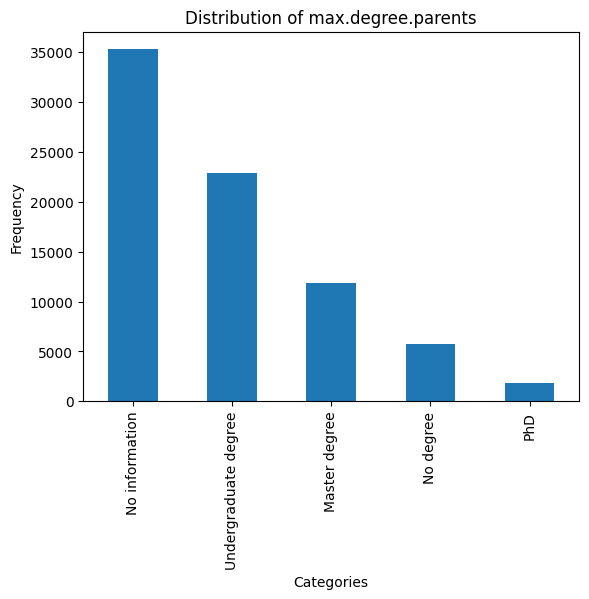

Cross-tabulation: max.degree.parents vs generation
generation             AD14  AD15  AD16  AD17  AD18  AD19  AD20
max.degree.parents                                             
Master degree            24    46   265  1387  3068  3431  3641
No degree                24    31   103   911  1542  1627  1502
No information        10014  9881  9882  5139   284    14    41
PhD                       4     7    38   228   484   508   566
Undergraduate degree     77    76   454  3123  5918  6619  6558
Chi-square statistic: 61102.43148227658
p-value: 0.0

Cross-tabulation: max.degree.parents vs level
level                 Undergraduate
max.degree.parents                 
Master degree                 11862
No degree                      5740
No information                35255
PhD                            1835
Undergraduate degree          22825
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: max.degree.parents vs gender
gender                Female   Male
max.degree.parents        

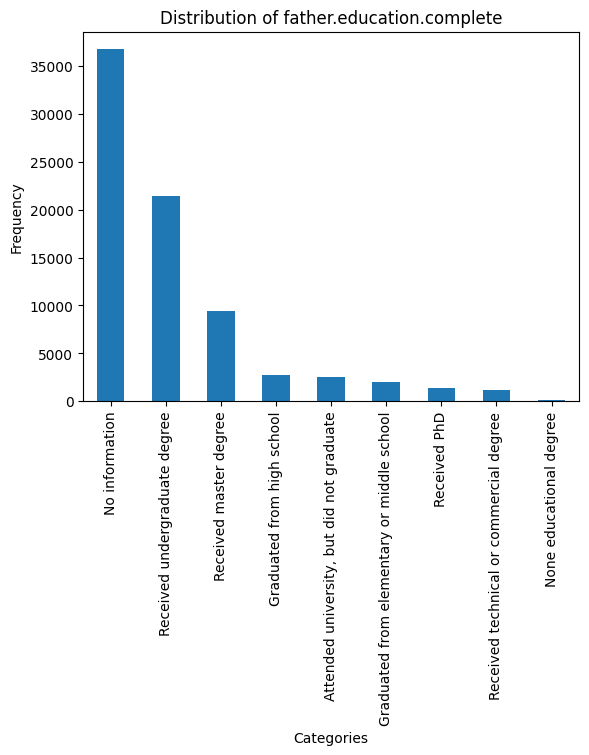

Cross-tabulation: father.education.complete vs generation
generation                                   AD14  AD15  AD16  AD17  AD18  \
father.education.complete                                                   
Attended university, but did not graduate      11     6    37   353   698   
Graduated from elementary or middle school      7     7    21   317   508   
Graduated from high school                      9    16    43   396   706   
No information                              10023  9896  9980  5420   673   
None educational degree                         0     1     0    20    44   
Received PhD                                    3     6    32   180   380   
Received master degree                         21    32   208  1111  2446   
Received technical or commercial degree         3     7    12   168   315   
Received undergraduate degree                  66    70   409  2823  5526   

generation                                  AD19  AD20  
father.education.complete            

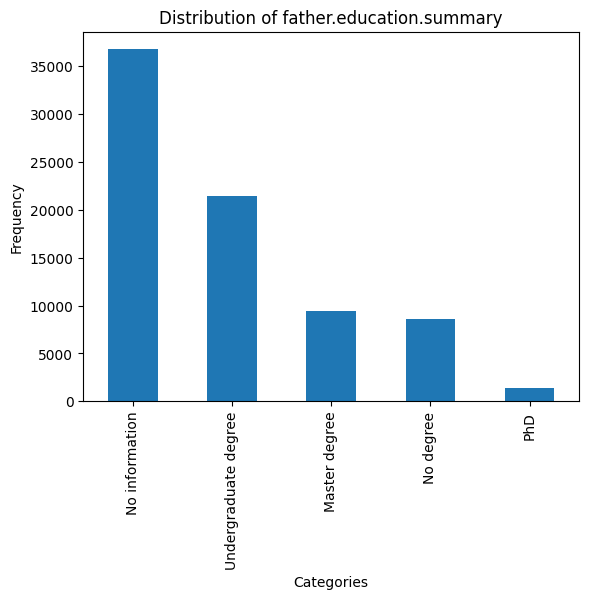

Cross-tabulation: father.education.summary vs generation
generation                 AD14  AD15  AD16  AD17  AD18  AD19  AD20
father.education.summary                                           
Master degree                21    32   208  1111  2446  2746  2845
No degree                    30    37   113  1254  2271  2434  2416
No information            10023  9896  9980  5420   673   355   395
PhD                           3     6    32   180   380   393   417
Undergraduate degree         66    70   409  2823  5526  6271  6235
Chi-square statistic: 57405.34996164971
p-value: 0.0

Cross-tabulation: father.education.summary vs level
level                     Undergraduate
father.education.summary               
Master degree                      9409
No degree                          8555
No information                    36742
PhD                                1411
Undergraduate degree              21400
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: father.education.summar

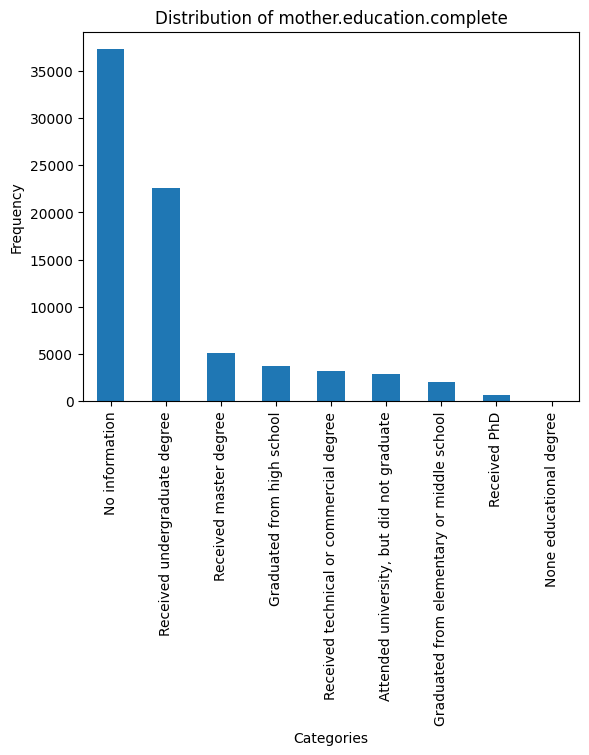

Cross-tabulation: mother.education.complete vs generation
generation                                   AD14  AD15   AD16  AD17  AD18  \
mother.education.complete                                                    
Attended university, but did not graduate      10     8     36   389   756   
Graduated from elementary or middle school     11    12     31   331   546   
Graduated from high school                     13    17     62   547  1014   
No information                              10026  9902  10036  5589   743   
None educational degree                         1     2      2    16    16   
Received PhD                                    1     3     12    74   188   
Received master degree                          7    17     95   563  1309   
Received technical or commercial degree        11    13     49   463   880   
Received undergraduate degree                  63    67    419  2816  5844   

generation                                  AD19  AD20  
mother.education.complete 

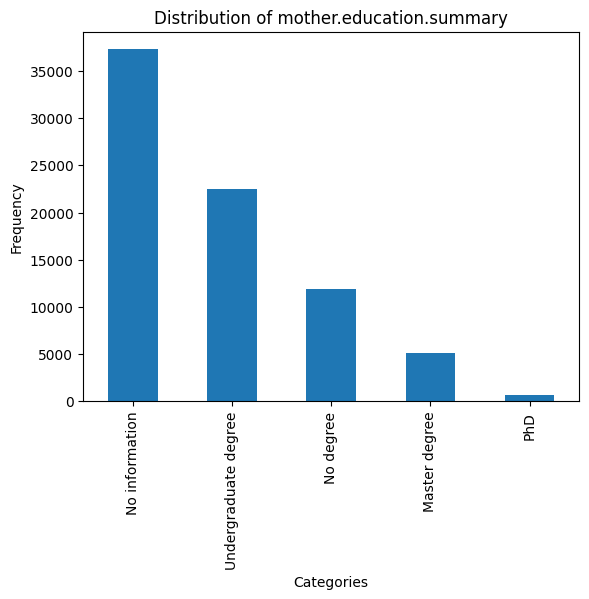

Cross-tabulation: mother.education.summary vs generation
generation                 AD14  AD15   AD16  AD17  AD18  AD19  AD20
mother.education.summary                                            
Master degree                 7    17     95   563  1309  1450  1644
No degree                    46    52    180  1746  3212  3413  3260
No information            10026  9902  10036  5589   743   529   457
PhD                           1     3     12    74   188   182   242
Undergraduate degree         63    67    419  2816  5844  6625  6705
Chi-square statistic: 56633.92961931907
p-value: 0.0

Cross-tabulation: mother.education.summary vs level
level                     Undergraduate
mother.education.summary               
Master degree                      5085
No degree                         11909
No information                    37282
PhD                                 702
Undergraduate degree              22539
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: mother.education

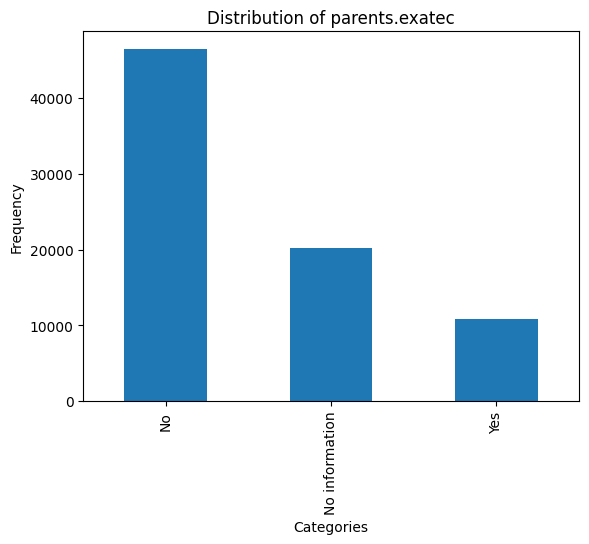

Cross-tabulation: parents.exatec vs generation
generation      AD14  AD15  AD16  AD17  AD18  AD19  AD20
parents.exatec                                          
No               266   513  8552  8470  9014  9809  9819
No information  9827  9431   393   374   118    42    34
Yes               50    97  1797  1944  2164  2348  2455
Chi-square statistic: 68160.53967115546
p-value: 0.0

Cross-tabulation: parents.exatec vs level
level           Undergraduate
parents.exatec               
No                      46443
No information          20219
Yes                     10855
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: parents.exatec vs gender
gender          Female   Male
parents.exatec               
No               21085  25358
No information    8771  11448
Yes               4847   6008
Chi-square statistic: 23.308758766073733
p-value: 8.680951781673391e-06

Cross-tabulation: parents.exatec vs max.degree.parents
max.degree.parents  Master degree  No degree  No information 

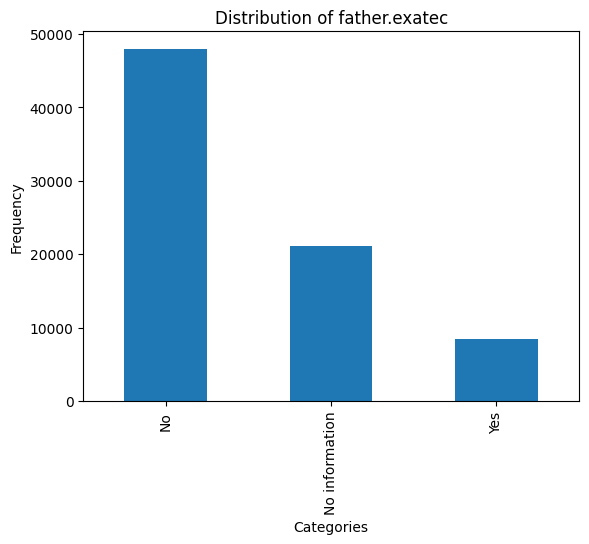

Cross-tabulation: father.exatec vs generation
generation      AD14  AD15  AD16  AD17  AD18   AD19   AD20
father.exatec                                             
No               259   504  8692  8674  9269  10224  10282
No information  9843  9458   652   584   329    131    126
Yes               41    79  1398  1530  1698   1844   1900
Chi-square statistic: 64529.92699870253
p-value: 0.0

Cross-tabulation: father.exatec vs level
level           Undergraduate
father.exatec                
No                      47904
No information          21123
Yes                      8490
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: father.exatec vs gender
gender          Female   Male
father.exatec                
No               21750  26154
No information    9212  11911
Yes               3741   4749
Chi-square statistic: 20.954348450895452
p-value: 2.8172218492550957e-05

Cross-tabulation: father.exatec vs max.degree.parents
max.degree.parents  Master degree  No degree  No infor

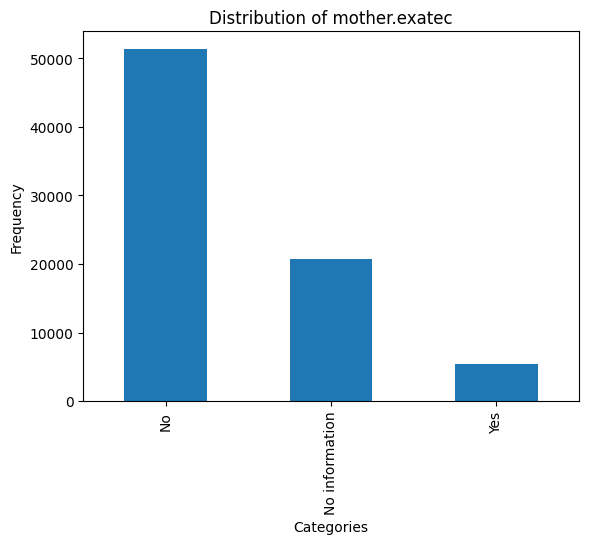

Cross-tabulation: mother.exatec vs generation
generation      AD14  AD15  AD16  AD17  AD18   AD19   AD20
mother.exatec                                             
No               268   539  9307  9256  9990  10984  10994
No information  9853  9463   564   592   232     45     40
Yes               22    39   871   940  1074   1170   1274
Chi-square statistic: 66174.57003801313
p-value: 0.0

Cross-tabulation: mother.exatec vs level
level           Undergraduate
mother.exatec                
No                      51338
No information          20789
Yes                      5390
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: mother.exatec vs gender
gender          Female   Male
mother.exatec                
No               23204  28134
No information    9025  11764
Yes               2474   2916
Chi-square statistic: 22.090884141875993
p-value: 1.595972700660842e-05

Cross-tabulation: mother.exatec vs max.degree.parents
max.degree.parents  Master degree  No degree  No inform

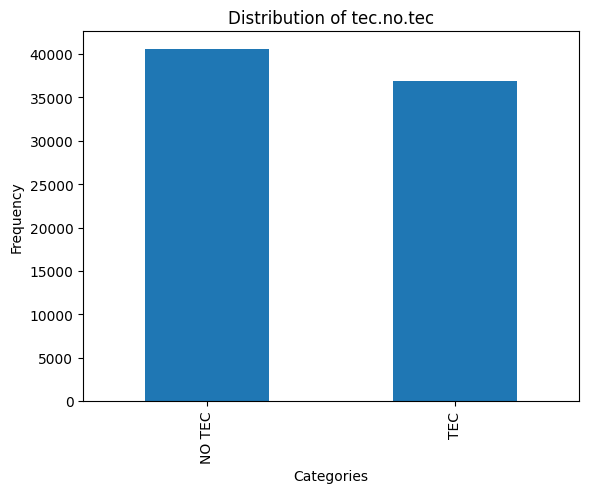

Cross-tabulation: tec.no.tec vs generation
generation  AD14  AD15  AD16  AD17  AD18  AD19  AD20
tec.no.tec                                          
NO TEC      5387  4929  5480  5782  5985  6437  6574
TEC         4756  5112  5262  5006  5311  5762  5734
Chi-square statistic: 67.79461210844025
p-value: 1.1574368565284896e-12

Cross-tabulation: tec.no.tec vs level
level       Undergraduate
tec.no.tec               
NO TEC              40574
TEC                 36943
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: tec.no.tec vs gender
gender      Female   Male
tec.no.tec               
NO TEC       17002  23572
TEC          17701  19242
Chi-square statistic: 282.29064694997874
p-value: 2.3792036212214853e-63

Cross-tabulation: tec.no.tec vs max.degree.parents
max.degree.parents  Master degree  No degree  No information   PhD  \
tec.no.tec                                                           
NO TEC                       5789       3678           18282   780   
TEC         

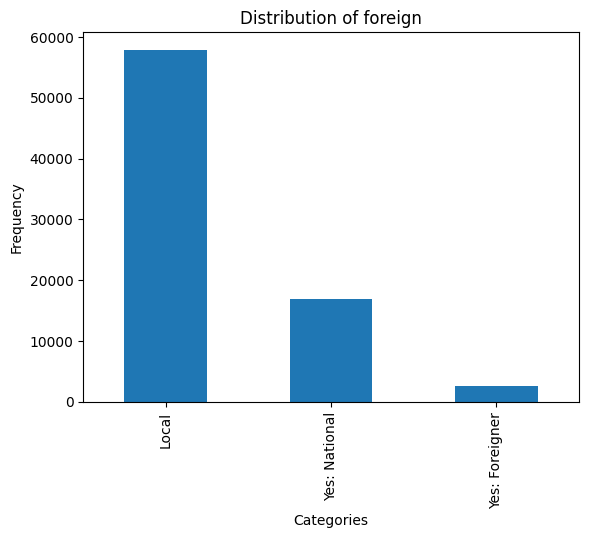

Cross-tabulation: foreign vs generation
generation      AD14  AD15  AD16  AD17  AD18  AD19  AD20
foreign                                                 
Local           7868  7588  7907  7928  8184  9182  9243
Yes: Foreigner   241   252   348   415   439   457   486
Yes: National   2034  2201  2487  2445  2673  2560  2579
Chi-square statistic: 161.37598349355568
p-value: 2.7537656363648328e-28

Cross-tabulation: foreign vs level
level           Undergraduate
foreign                      
Local                   57900
Yes: Foreigner           2638
Yes: National           16979
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: foreign vs gender
gender          Female   Male
foreign                      
Local            26311  31589
Yes: Foreigner     958   1680
Yes: National     7434   9545
Chi-square statistic: 93.52257447937095
p-value: 4.918480853392977e-21

Cross-tabulation: foreign vs max.degree.parents
max.degree.parents  Master degree  No degree  No information   PhD  \


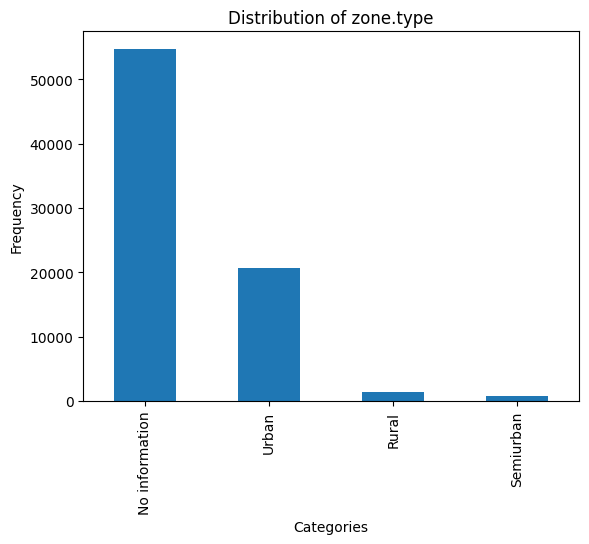

Cross-tabulation: zone.type vs generation
generation       AD14   AD15   AD16   AD17   AD18   AD19   AD20
zone.type                                                      
No information  10143  10041  10742  10788  11296   1039    669
Rural               0      0      0      0      0    639    716
Semiurban           0      0      0      0      0    386    402
Urban               0      0      0      0      0  10135  10521
Chi-square statistic: 69897.35215948698
p-value: 0.0

Cross-tabulation: zone.type vs level
level           Undergraduate
zone.type                    
No information          54718
Rural                    1355
Semiurban                 788
Urban                   20656
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: zone.type vs gender
gender          Female   Male
zone.type                    
No information   24349  30369
Rural              600    755
Semiurban          353    435
Urban             9401  11255
Chi-square statistic: 6.35768226677247
p-valu

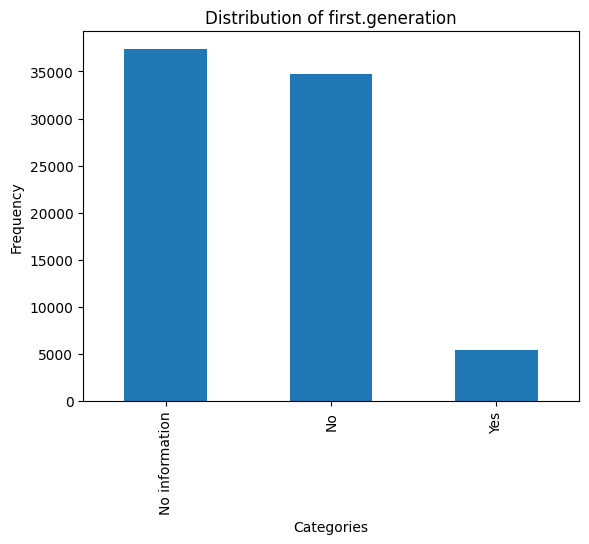

Cross-tabulation: first.generation vs generation
generation         AD14   AD15   AD16  AD17  AD18   AD19   AD20
first.generation                                               
No                    0      0      0  4420  9009  10558  10765
No information    10143  10041  10742  5478   913     14     41
Yes                   0      0      0   890  1374   1627   1502
Chi-square statistic: 63214.533642773524
p-value: 0.0

Cross-tabulation: first.generation vs level
level             Undergraduate
first.generation               
No                        34752
No information            37372
Yes                        5393
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: first.generation vs gender
gender            Female   Male
first.generation               
No                 15697  19055
No information     16494  20878
Yes                 2512   2881
Chi-square statistic: 15.471188311033503
p-value: 0.00043699266167440974

Cross-tabulation: first.generation vs max.degree.pare

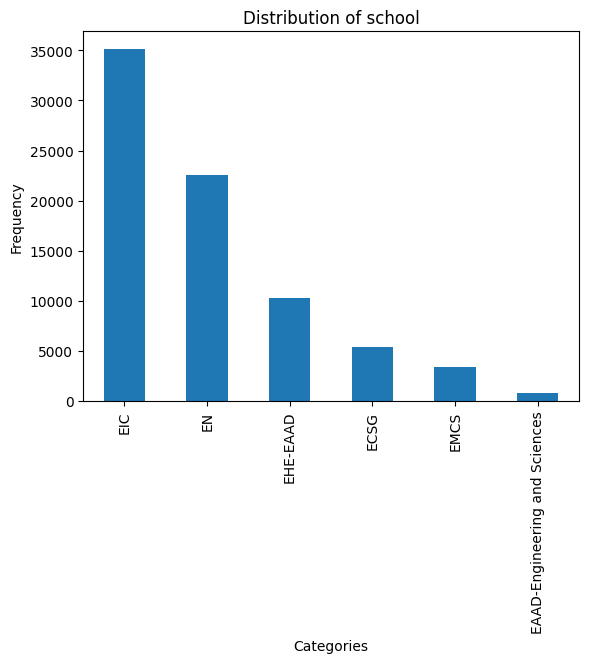

Cross-tabulation: school vs generation
generation                     AD14  AD15  AD16  AD17  AD18  AD19  AD20
school                                                                 
EAAD-Engineering and Sciences     0     0     0     0     0   357   390
ECSG                            666   682   758   836   846   822   774
EHE-EAAD                       1468  1355  1368  1526  1597  1497  1506
EIC                            4576  4673  5190  4755  5187  5432  5324
EMCS                            375   373   406   519   530   540   619
EN                             3058  2958  3020  3152  3136  3551  3695
Chi-square statistic: 1800.505136897203
p-value: 0.0

Cross-tabulation: school vs level
level                          Undergraduate
school                                      
EAAD-Engineering and Sciences            747
ECSG                                    5384
EHE-EAAD                               10317
EIC                                    35137
EMCS                       

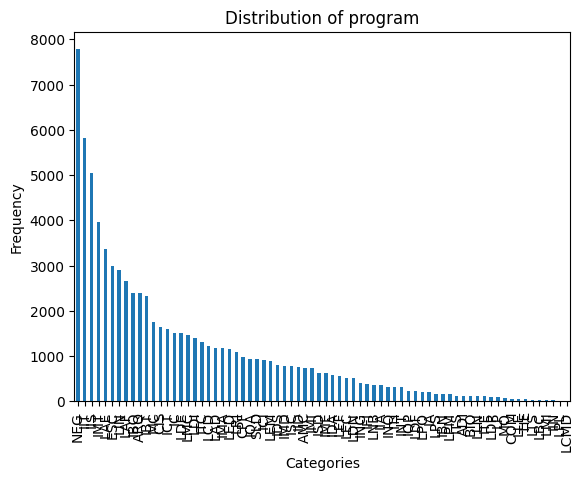

Cross-tabulation: program vs generation
generation  AD14  AD15  AD16  AD17  AD18  AD19  AD20
program                                             
ADI            0     0     0    40    79     0     0
AMC            0     0     0     0     0   357   390
ARQ          488   466   469   486   485     0     0
BIO            0     0     0    36    80     0     0
CIS            0     0     0    29    21   817   774
...          ...   ...   ...   ...   ...   ...   ...
MC           271   276   281   306   301     0   332
MO             9     7    23    23    24     0     0
NEG            0     0     0   200   345  3546  3688
SLD            0     0     0    51    60   539   287
TIE            0     0     0    22    23     0     0

[72 rows x 7 columns]
Chi-square statistic: 78766.61154792123
p-value: 0.0

Cross-tabulation: program vs level
level    Undergraduate
program               
ADI                119
AMC                747
ARQ               2394
BIO                116
CIS               164

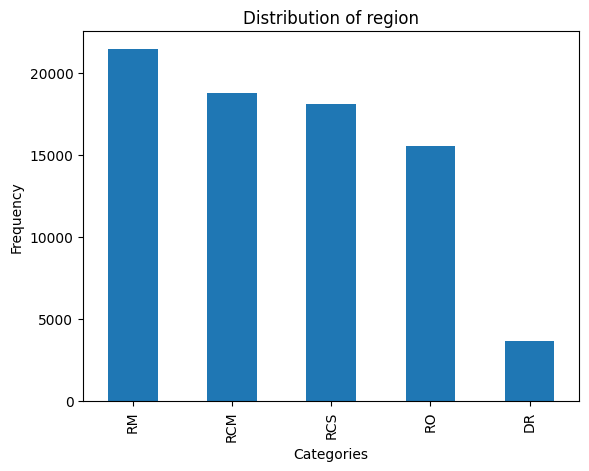

Cross-tabulation: region vs generation
generation  AD14  AD15  AD16  AD17  AD18  AD19  AD20
region                                              
DR           345   350   611   550   622   591   617
RCM         2480  2562  2603  2581  2710  2953  2870
RCS         2472  2369  2530  2531  2623  2704  2874
RM          2682  2666  2828  2984  3205  3578  3498
RO          2164  2094  2170  2142  2136  2373  2449
Chi-square statistic: 190.4997723727325
p-value: 7.120219032360711e-28

Cross-tabulation: region vs level
level   Undergraduate
region               
DR               3686
RCM             18759
RCS             18103
RM              21441
RO              15528
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: region vs gender
gender  Female   Male
region               
DR        1714   1972
RCM       8555  10204
RCS       8129   9974
RM        9404  12037
RO        6901   8627
Chi-square statistic: 17.73823100088405
p-value: 0.0013882584015479907

Cross-tabulation: region vs m

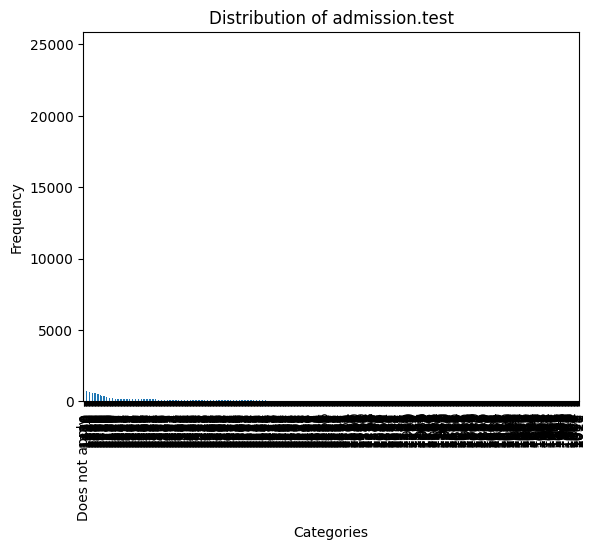

Cross-tabulation: admission.test vs generation
generation       AD14  AD15  AD16  AD17  AD18  AD19  AD20
admission.test                                           
1                   0     0     0     0     0     4     0
1000                1     0     0     0     0    13    11
1001                1     1     0     1     0     0     0
1003                2     0     1     0     0     0     0
1004                0     1     0     0     0     0     0
...               ...   ...   ...   ...   ...   ...   ...
984                 1     0     0     0     0     0     0
986                 1     0     0     0     0     0     0
989                 1     0     0     0     0     0     0
990                 1     0     0     0     0     5     6
Does not apply   3924  3417  3652  3530  3601  2597  3903

[668 rows x 7 columns]
Chi-square statistic: 57782.5222041857
p-value: 0.0

Cross-tabulation: admission.test vs level
level            Undergraduate
admission.test                
1                 

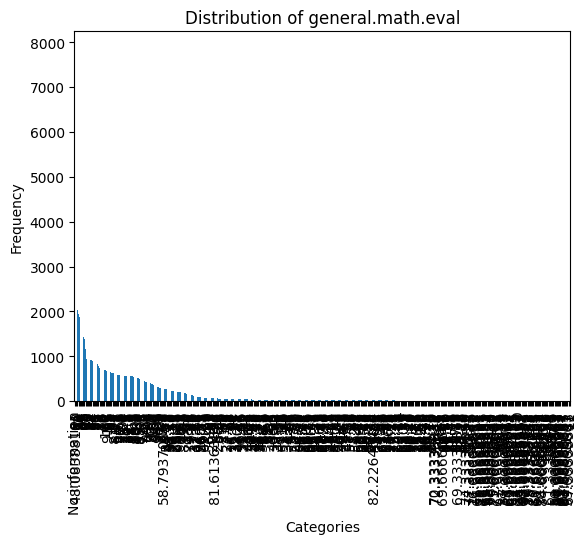

Cross-tabulation: general.math.eval vs generation
generation         AD14  AD15  AD16  AD17  AD18  AD19  AD20
general.math.eval                                          
0                     0     0     0     0     0     0     2
10                    4     0     0     0     1     0     0
100                  94   102    79    39   200   170     0
11                    0     0     0     0     0     0     1
11.25                 0     0     0     0     0     0     1
...                 ...   ...   ...   ...   ...   ...   ...
98.25                 0     0     0     0     0     0     1
98.5                 31    30    35    32    33    39     0
99                   52    61    36    56    44    48     0
99.5                 22    26    20    25    17    20     0
No information      629   460  5475   712   571     0     0

[422 rows x 7 columns]
Chi-square statistic: 121653.64770658186
p-value: 0.0

Cross-tabulation: general.math.eval vs level
level              Undergraduate
general.math.

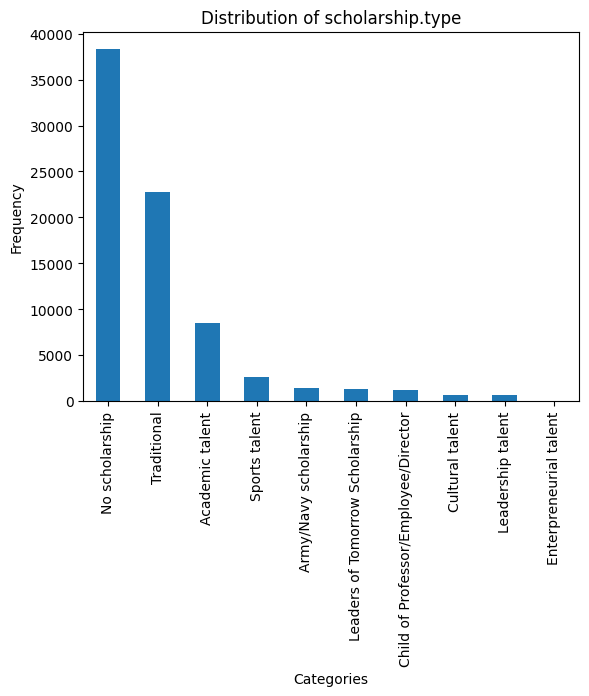

Cross-tabulation: scholarship.type vs generation
generation                            AD14  AD15  AD16  AD17  AD18  AD19  AD20
scholarship.type                                                              
Academic talent                        622   901   971  1105  1367  1698  1799
Army/Navy scholarship                  193   137   169   361   447     0   131
Child of Professor/Employee/Director   167   182   166   123   195   178   203
Cultural talent                         73    77    86    81   105   122   148
Enterpreneurial talent                   0     0     0     0     0    29    12
Leaders of Tomorrow Scholarship        200   166   212   199   210   201   152
Leadership talent                       40    66   109    76    80   151   116
No scholarship                        4869  4837  5306  5180  5382  6529  6202
Sports talent                          404   385   337   333   364   349   444
Traditional                           3575  3290  3386  3330  3146  2942  3101
Chi

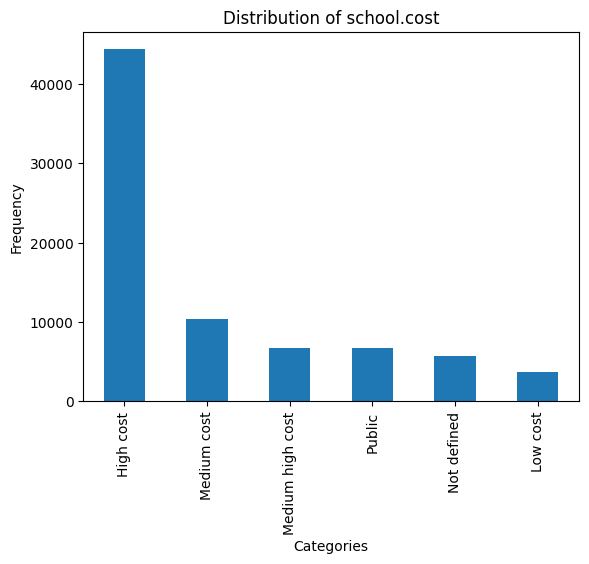

Cross-tabulation: school.cost vs generation
generation        AD14  AD15  AD16  AD17  AD18  AD19  AD20
school.cost                                               
High cost         6112  6400  6817  6646  7032  7348  3959
Low cost           412   387   409   455   536   507  1060
Medium cost       1425  1230  1269  1232  1303  1178  2690
Medium high cost   773   716   734   826   812   783  2088
Not defined        518   474   650   739   721  1486  1099
Public             903   834   863   890   892   897  1412
Chi-square statistic: 4901.896386773339
p-value: 0.0

Cross-tabulation: school.cost vs level
level             Undergraduate
school.cost                    
High cost                 44314
Low cost                   3766
Medium cost               10327
Medium high cost           6732
Not defined                5687
Public                     6691
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: school.cost vs gender
gender            Female   Male
school.cost            

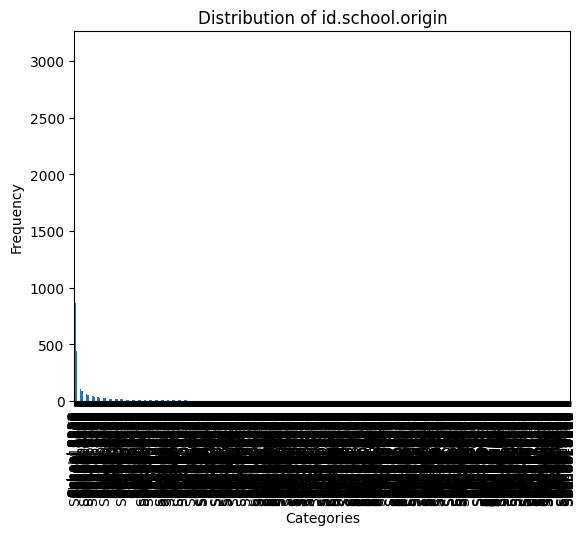

Cross-tabulation: id.school.origin vs generation
generation        AD14  AD15  AD16  AD17  AD18  AD19  AD20
id.school.origin                                          
School 0             0     2     1     1     0     0     0
School 1             0     0     0     0     0     0     1
School 10000         0     0     0     0     1     0     0
School 10001         0     0     0     0     1     0     0
School 10002         0     0     0     0     0     0     1
...                ...   ...   ...   ...   ...   ...   ...
School 9995          0     0     0     0     1     0     0
School 9996          0     0     0     0     1     0     0
School 9997          0     0     0     0     1     0     0
School 9998          0     0     0     0     1     0     0
School 9999          0     0     0     0     1     0     0

[6534 rows x 7 columns]
Chi-square statistic: 75737.63039928988
p-value: 0.0

Cross-tabulation: id.school.origin vs level
level             Undergraduate
id.school.origin             

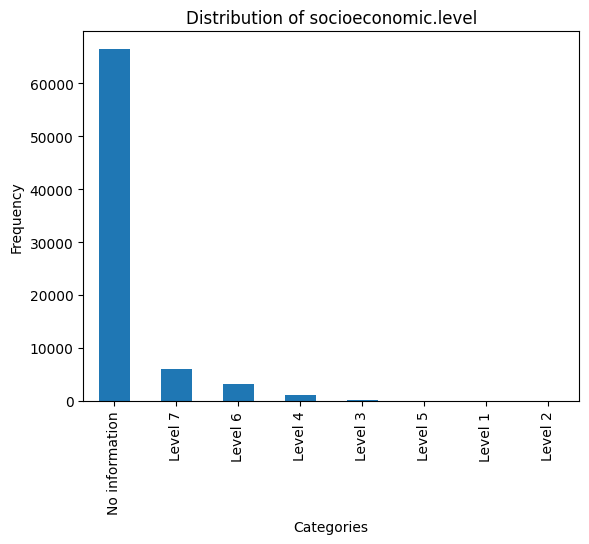

Cross-tabulation: socioeconomic.level vs generation
generation            AD14   AD15   AD16   AD17   AD18  AD19  AD20
socioeconomic.level                                               
Level 1                  0      0      0      0      0    14    24
Level 2                  0      0      0      0      0    12    15
Level 3                  0      0      0      0      0   118   134
Level 4                  0      0      0      0      0   602   618
Level 5                  0      0      0      0      0    51    48
Level 6                  0      0      0      0      0  1609  1692
Level 7                  0      0      0      0      0  3092  3042
No information       10143  10041  10742  10788  11296  6701  6735
Chi-square statistic: 27957.23086103399
p-value: 0.0

Cross-tabulation: socioeconomic.level vs level
level                Undergraduate
socioeconomic.level               
Level 1                         38
Level 2                         27
Level 3                        252
Le

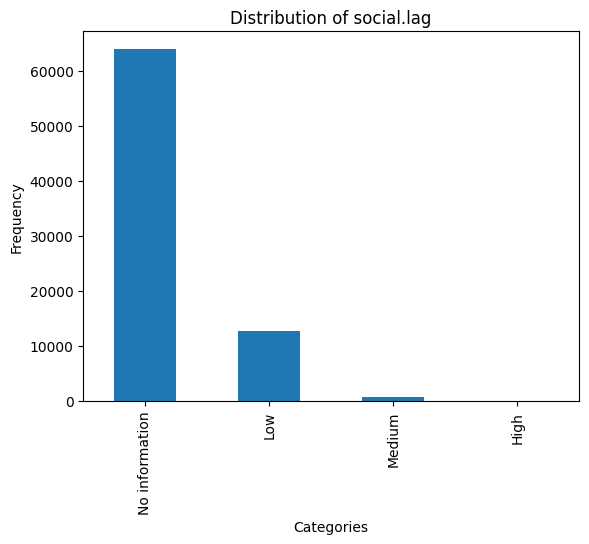

Cross-tabulation: social.lag vs generation
generation       AD14   AD15   AD16   AD17   AD18  AD19  AD20
social.lag                                                   
High                0      0      0      0      0    27    28
Low                 0      0      0      0      0  6314  6453
Medium              0      0      0      0      0   333   378
No information  10143  10041  10742  10788  11296  5525  5449
Chi-square statistic: 35474.23106526381
p-value: 0.0

Cross-tabulation: social.lag vs level
level           Undergraduate
social.lag                   
High                       55
Low                     12767
Medium                    711
No information          63984
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: social.lag vs gender
gender          Female   Male
social.lag                   
High                19     36
Low               5819   6948
Medium             312    399
No information   28553  35431
Chi-square statistic: 6.469173073831958
p-value: 0.090

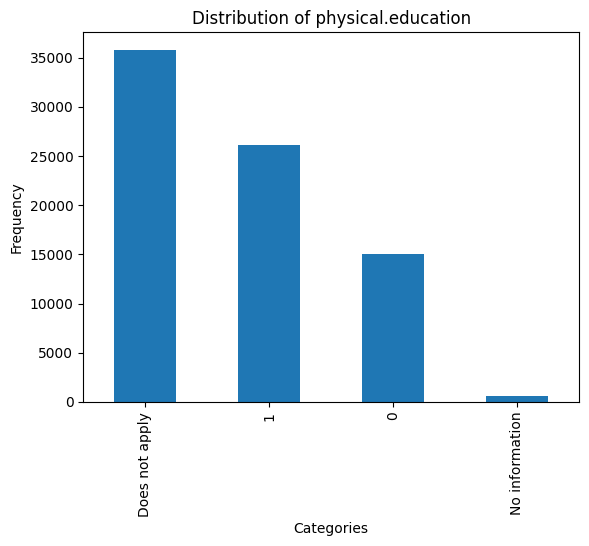

Cross-tabulation: physical.education vs generation
generation          AD14  AD15  AD16  AD17   AD18   AD19   AD20
physical.education                                             
0                   3866  2972  3685  4469      0      0      0
1                   6170  6945  6816  6233      0      0      0
Does not apply         0     0     0     0  11296  12199  12308
No information       107   124   241    86      0      0      0
Chi-square statistic: 78326.41638001066
p-value: 0.0

Cross-tabulation: physical.education vs level
level               Undergraduate
physical.education               
0                           14992
1                           26164
Does not apply              35803
No information                558
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: physical.education vs gender
gender              Female   Male
physical.education               
0                     7415   7577
1                    10758  15406
Does not apply       16250  19553
No i

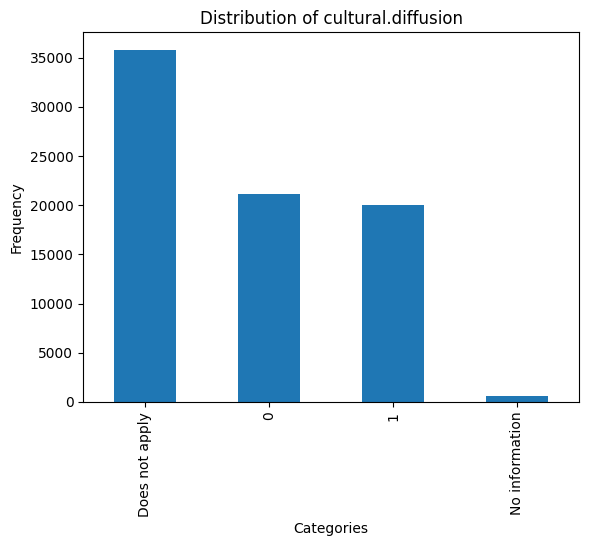

Cross-tabulation: cultural.diffusion vs generation
generation          AD14  AD15  AD16  AD17   AD18   AD19   AD20
cultural.diffusion                                             
0                   4554  4248  6065  6280      0      0      0
1                   5482  5669  4436  4422      0      0      0
Does not apply         0     0     0     0  11296  12199  12308
No information       107   124   241    86      0      0      0
Chi-square statistic: 79248.71754490504
p-value: 0.0

Cross-tabulation: cultural.diffusion vs level
level               Undergraduate
cultural.diffusion               
0                           21147
1                           20009
Does not apply              35803
No information                558
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: cultural.diffusion vs gender
gender              Female   Male
cultural.diffusion               
0                     8453  12694
1                     9720  10289
Does not apply       16250  19553
No i

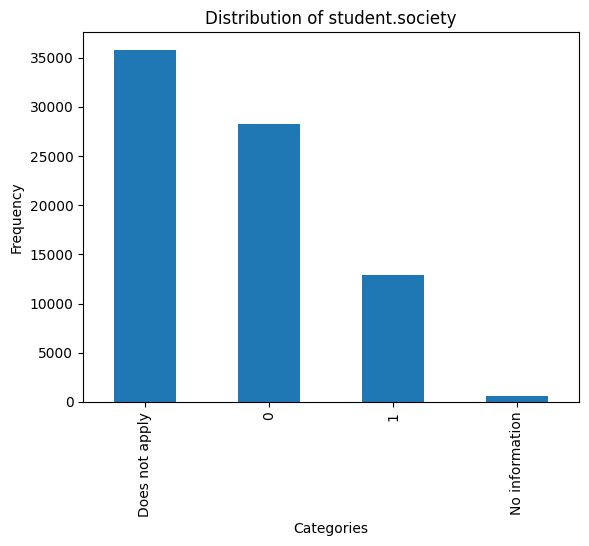

Cross-tabulation: student.society vs generation
generation       AD14  AD15  AD16  AD17   AD18   AD19   AD20
student.society                                             
0                7296  6593  6632  7735      0      0      0
1                2740  3324  3869  2967      0      0      0
Does not apply      0     0     0     0  11296  12199  12308
No information    107   124   241    86      0      0      0
Chi-square statistic: 78274.52051283474
p-value: 0.0

Cross-tabulation: student.society vs level
level            Undergraduate
student.society               
0                        28256
1                        12900
Does not apply           35803
No information             558
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: student.society vs gender
gender           Female   Male
student.society               
0                 11855  16401
1                  6318   6582
Does not apply    16250  19553
No information      280    278
Chi-square statistic: 194.9553565

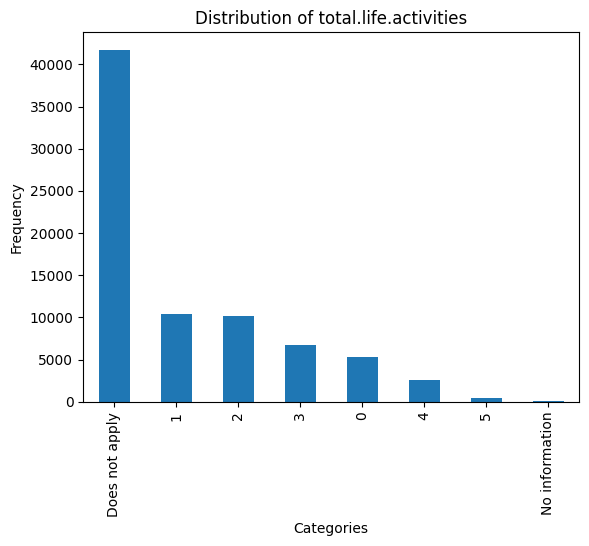

Cross-tabulation: total.life.activities vs generation
generation              AD14   AD15   AD16   AD17  AD18  AD19  AD20
total.life.activities                                              
0                          0      0      0      0   401  2540  2381
1                          0      0      0      0  2188  4220  4054
2                          0      0      0      0  3575  3092  3558
3                          0      0      0      0  3196  1623  1895
4                          0      0      0      0  1658   625   290
5                          0      0      0      0   278    99    20
Does not apply         10143  10041  10742  10788     0     0     0
No information             0      0      0      0     0     0   110
Chi-square statistic: 87781.98179326956
p-value: 0.0

Cross-tabulation: total.life.activities vs level
level                  Undergraduate
total.life.activities               
0                               5322
1                              10462
2              

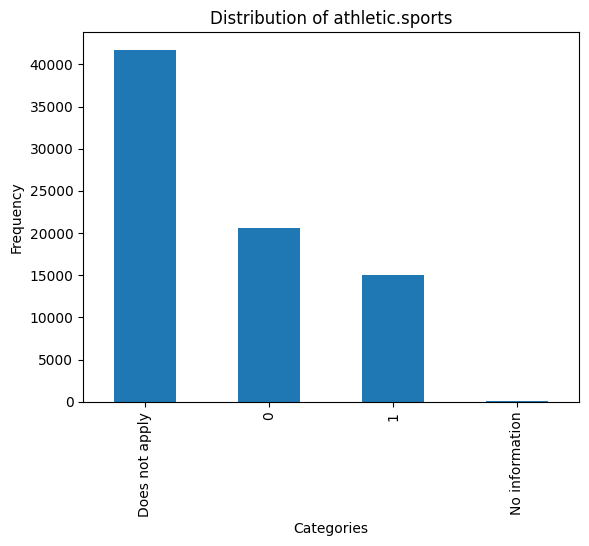

Cross-tabulation: athletic.sports vs generation
generation        AD14   AD15   AD16   AD17  AD18  AD19  AD20
athletic.sports                                              
0                    0      0      0      0  5463  5938  9229
1                    0      0      0      0  5833  6261  2969
Does not apply   10143  10041  10742  10788     0     0     0
No information       0      0      0      0     0     0   110
Chi-square statistic: 83206.40091856598
p-value: 0.0

Cross-tabulation: athletic.sports vs level
level            Undergraduate
athletic.sports               
0                        20630
1                        15063
Does not apply           41714
No information             110
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: athletic.sports vs gender
gender           Female   Male
athletic.sports               
0                  9940  10690
1                  6250   8813
Does not apply    18453  23261
No information       60     50
Chi-square statistic: 171.6

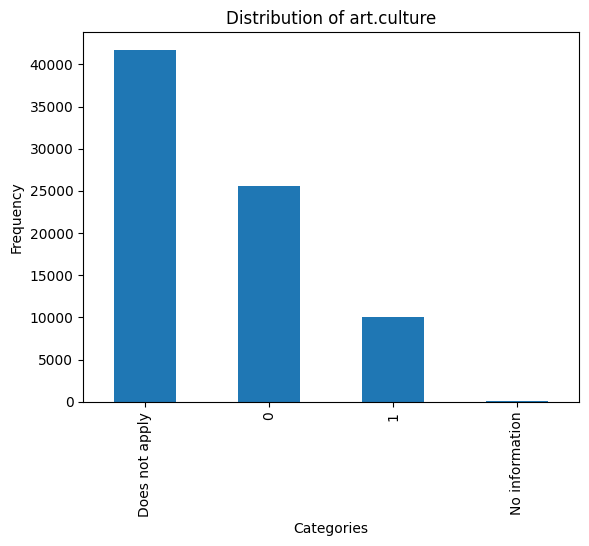

Cross-tabulation: art.culture vs generation
generation       AD14   AD15   AD16   AD17  AD18  AD19  AD20
art.culture                                                 
0                   0      0      0      0  7689  8717  9201
1                   0      0      0      0  3607  3482  2997
Does not apply  10143  10041  10742  10788     0     0     0
No information      0      0      0      0     0     0   110
Chi-square statistic: 78313.59425633756
p-value: 0.0

Cross-tabulation: art.culture vs level
level           Undergraduate
art.culture                  
0                       25607
1                       10086
Does not apply          41714
No information            110
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: art.culture vs gender
gender          Female   Male
art.culture                  
0                10659  14948
1                 5531   4555
Does not apply   18453  23261
No information      60     50
Chi-square statistic: 524.96039771789
p-value: 1.85834480

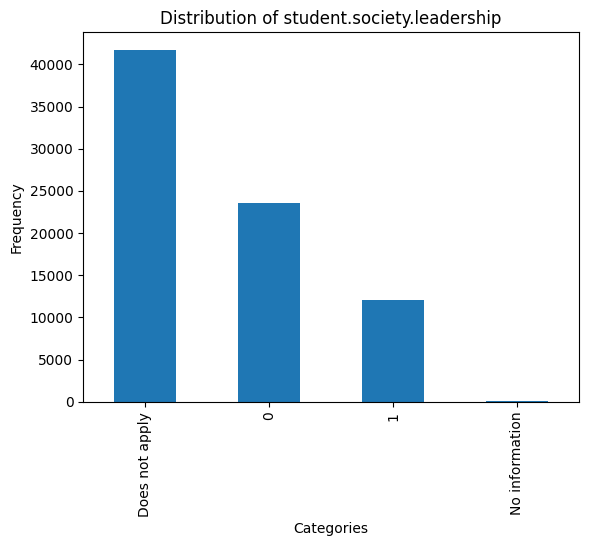

Cross-tabulation: student.society.leadership vs generation
generation                   AD14   AD15   AD16   AD17  AD18  AD19  AD20
student.society.leadership                                              
0                               0      0      0      0  7836  7935  7827
1                               0      0      0      0  3460  4264  4371
Does not apply              10143  10041  10742  10788     0     0     0
No information                  0      0      0      0     0     0   110
Chi-square statistic: 78147.03723958023
p-value: 0.0

Cross-tabulation: student.society.leadership vs level
level                       Undergraduate
student.society.leadership               
0                                   23598
1                                   12095
Does not apply                      41714
No information                        110
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: student.society.leadership vs gender
gender                      Female   Male
studen

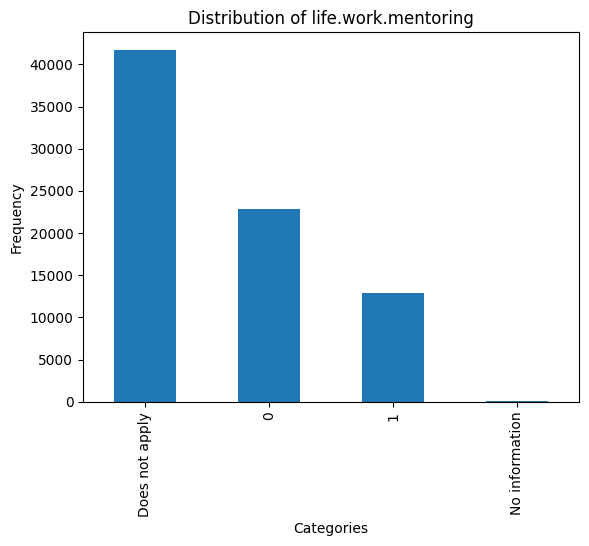

Cross-tabulation: life.work.mentoring vs generation
generation            AD14   AD15   AD16   AD17  AD18   AD19   AD20
life.work.mentoring                                                
0                        0      0      0      0  1532  10547  10753
1                        0      0      0      0  9764   1652   1445
Does not apply       10143  10041  10742  10788     0      0      0
No information           0      0      0      0     0      0    110
Chi-square statistic: 117492.2506136286
p-value: 0.0

Cross-tabulation: life.work.mentoring vs level
level                Undergraduate
life.work.mentoring               
0                            22832
1                            12861
Does not apply               41714
No information                 110
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: life.work.mentoring vs gender
gender               Female   Male
life.work.mentoring               
0                     10417  12415
1                      5773   7088
D

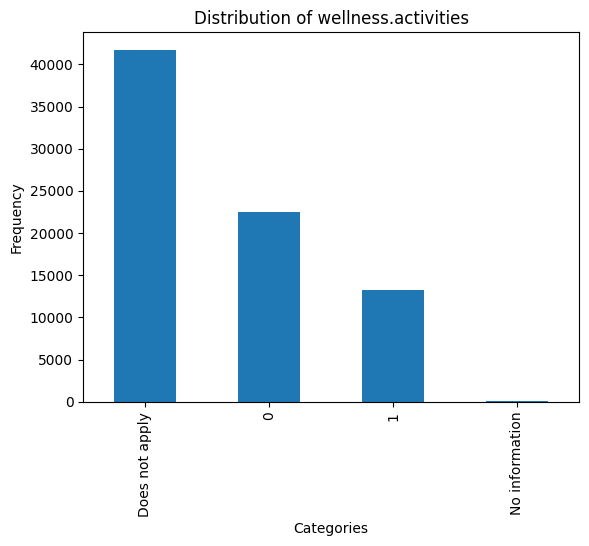

Cross-tabulation: wellness.activities vs generation
generation            AD14   AD15   AD16   AD17  AD18  AD19  AD20
wellness.activities                                              
0                        0      0      0      0  7012  9590  5865
1                        0      0      0      0  4284  2609  6333
Does not apply       10143  10041  10742  10788     0     0     0
No information           0      0      0      0     0     0   110
Chi-square statistic: 83256.14275549664
p-value: 0.0

Cross-tabulation: wellness.activities vs level
level                Undergraduate
wellness.activities               
0                            22467
1                            13226
Does not apply               41714
No information                 110
Chi-square statistic: 0.0
p-value: 1.0

Cross-tabulation: wellness.activities vs gender
gender               Female   Male
wellness.activities               
0                      9945  12522
1                      6245   6981
Does not appl

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


for column in df.columns:
    if df[column].dtype == 'object':
        unique_categories = df[column].unique()
        print(f"Column: {column}")
        print("Unique Categories:", unique_categories)
        
        frequency_counts = df[column].value_counts()
        print("Frequency Counts:")
        print(frequency_counts)
        
        df[column].value_counts().plot(kind='bar')
        plt.xlabel('Categories')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()
        
        for other_column in df.columns:
            if df[other_column].dtype == 'object' and other_column != column:
                cross_tab = pd.crosstab(df[column], df[other_column])
                print(f"Cross-tabulation: {column} vs {other_column}")
                print(cross_tab)
                
                # Chi-square test
                chi2, p_value, dof, expected = chi2_contingency(cross_tab)
                print("Chi-square statistic:", chi2)
                print("p-value:", p_value)
                print()
                
        print("......................................")


In [50]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Select the single continuous variable for correlation analysis
target_variable = 'dropout.semester'

# Calculate the correlation between the target variable and all other variables
correlations = {}
for column in df.columns:
    if column != target_variable and df[column].dtype != 'object':
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            # Remove rows with missing values for correlation calculation
            mask = np.logical_and(np.isfinite(df[column]), np.isfinite(df[target_variable]))
            correlation, p_value = stats.pearsonr(df[column][mask], df[target_variable][mask])
            correlation_type = 'Pearson'
        else:
            # Impute missing values for correlation calculation
            df_temp = df[[column, target_variable]].dropna()
            correlation, p_value = stats.spearmanr(df_temp[column], df_temp[target_variable])
            correlation_type = 'Spearman'
        
        correlations[column] = (correlation, p_value, correlation_type)

# Sort the correlations by absolute value in descending order
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1][0]), reverse=True)

# Print the correlations
for variable, (correlation, p_value, correlation_type) in sorted_correlations:
    print(f"{correlation_type} correlation between {variable} and {target_variable}:")
    print("Correlation:", correlation)
    print("p-value:", p_value)
    print("==============================")


/Users/pablo/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


NameError: name 'df_temp' is not defined

In [36]:
!pip3 install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 226 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/Users/pablo/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


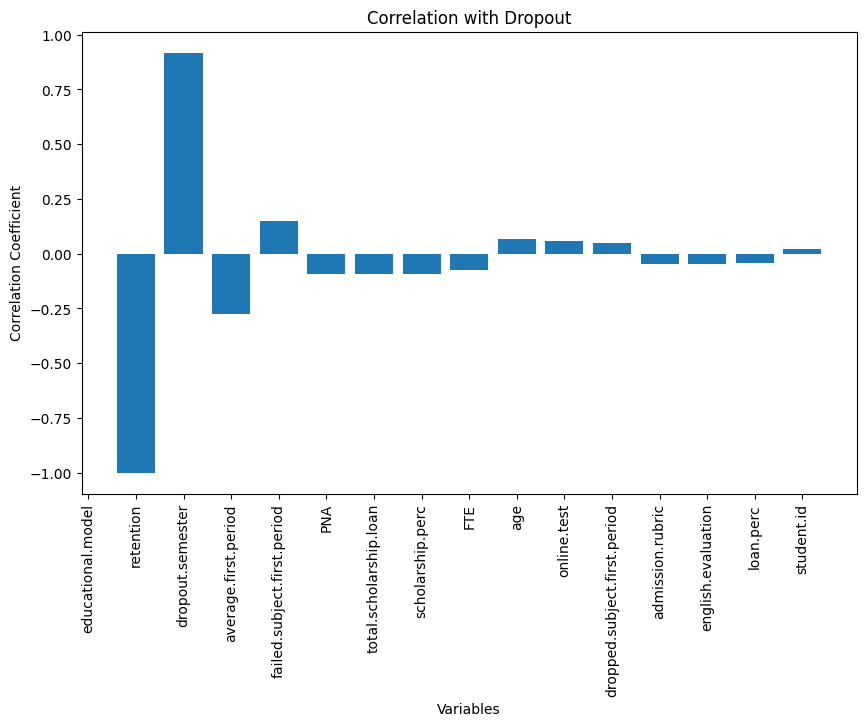

In [71]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Select the single continuous variable for correlation analysis
target_variable = 'Dropout'

# Calculate the correlation between the target variable and all other variables
correlations = {}
for column in df.columns:
    if column != target_variable and df[column].dtype != 'object':
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            # Remove rows with missing values for correlation calculation
            mask = np.logical_and(np.isfinite(df[column]), np.isfinite(df[target_variable]))
            correlation, p_value = stats.pearsonr(df[column][mask], df[target_variable][mask])
            correlation_type = 'Pearson'
        else:
            # Impute missing values for correlation calculation
            df_temp = df[[column, target_variable]].dropna()
            correlation, p_value = stats.spearmanr(df_temp[column], df_temp[target_variable])
            correlation_type = 'Spearman'
        
        correlations[column] = (correlation, p_value, correlation_type)

# Sort the correlations by absolute value in descending order
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1][0]), reverse=True)

# Extract correlation coefficients and variable names
variable_names = [var[0] for var in sorted_correlations]
correlation_coeffs = [var[1][0] for var in sorted_correlations]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(variable_names, correlation_coeffs)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation with {target_variable}')
plt.xticks(rotation=90)
plt.show()


In [48]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Assuming 'X' is your feature matrix and 'y' is your target variable



False    1545
True     1545
Name: Dropout, dtype: int64
Accuracy: 0.5906148867313916
Precision: 0.6727272727272727
Recall: 0.2542955326460481
F1-score: 0.369077306733167


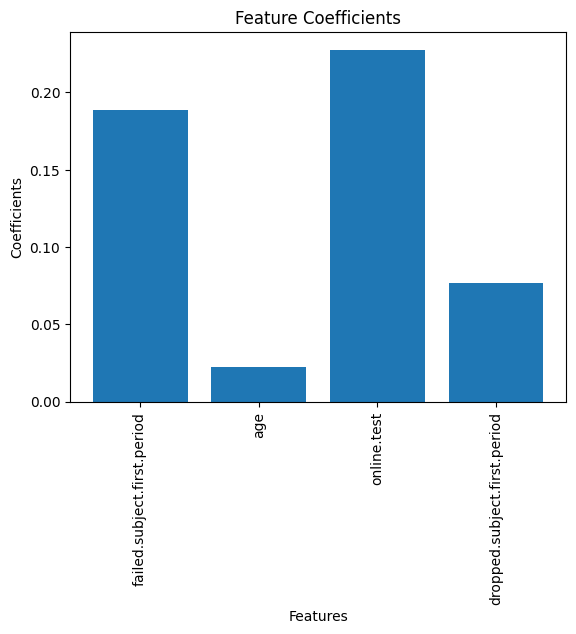

In [80]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
feature_names = ["failed.subject.first.period", "age", "online.test", "dropped.subject.first.period"]

df.dropna(inplace=True)

y = df['Dropout'].astype(bool)

print(y.value_counts())

df["dropped.subject.first.period"] = df["dropped.subject.first.period"].astype(int)
df["failed.subject.first.period"] = df["failed.subject.first.period"].astype(int)
df["online.test"] = df["online.test"].astype(int)
X = df[feature_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = np.round(model.predict(X_test)).astype(bool)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

coefficients = model.coef_

# Create a bar plot of feature coefficients
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Coefficients')
plt.xticks(rotation=90)
plt.show()


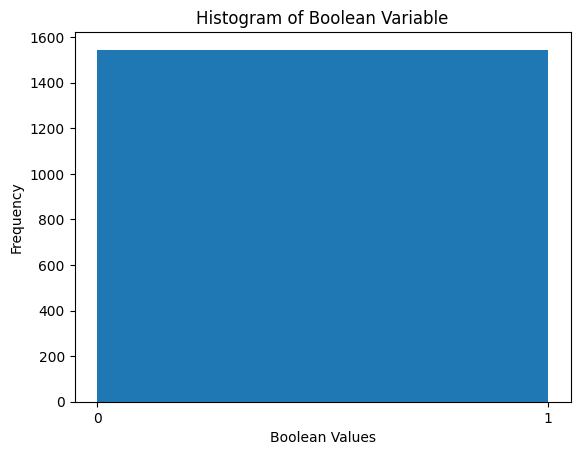

In [81]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'boolean_column' is the name of the boolean column
rus = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(df.drop(columns=['Dropout']), df['Dropout'])

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=df.drop(columns=['Dropout']).columns)
df_balanced['Dropout'] = y_resampled

df = df_balanced
# Plotting the histogram
plt.hist(df["retention"], bins=2)
plt.xlabel('Boolean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Boolean Variable')
plt.xticks([0, 1])  # Set the x-axis ticks to match the boolean values
plt.show()


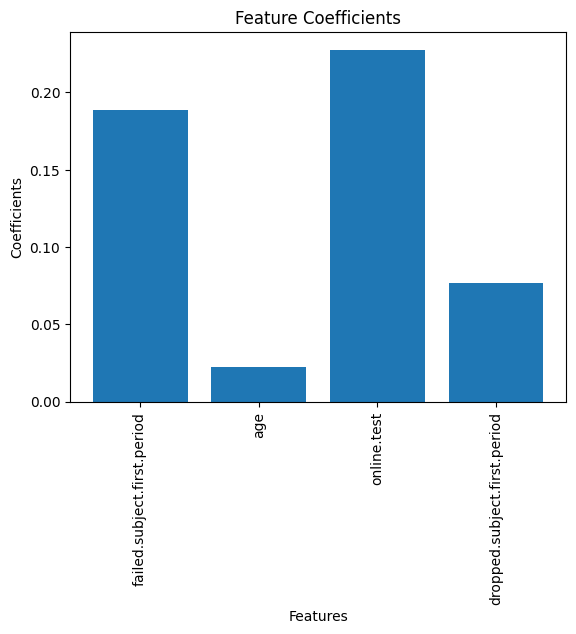

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'model' is your trained Random Forest Classifier and 'feature_names' is an array of feature names

coefficients = model.coef_

# Create a bar plot of feature coefficients
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Coefficients')
plt.xticks(rotation=90)
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix



Accuracy: 0.6019417475728155
